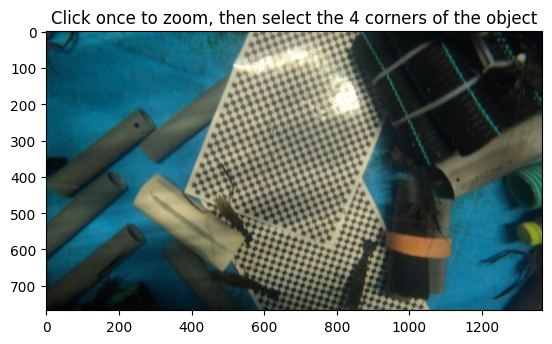

points: []


IndexError: index 0 is out of bounds for axis 0 with size 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def resize_image_to_screen(image, screen_width, screen_height, keep_aspect_ratio=False):
    img_height, img_width = image.shape[:2]

    if keep_aspect_ratio:
        # Calculate the ratio of the screen dimensions to the image dimensions
        width_ratio = screen_width / img_width
        height_ratio = screen_height / img_height

        # Use the smaller ratio to ensure the entire image fits within the screen
        resize_ratio = min(width_ratio, height_ratio)
        new_width = int(img_width * resize_ratio)
        new_height = int(img_height * resize_ratio)

        resized_image = cv2.resize(image, (new_width, new_height))
    else:
        resized_image = cv2.resize(image, (screen_width, screen_height))

    return resized_image


#"C:\Users\gbo10\OneDrive\pictures\labeling\65\65\test\images\GX010094_MP4-0_jpg.rf.dcf3d1515810af1e22925baaf0a60166.jpg"
# Load the image using OpenCV
image_path = "C:\\Users\\gbo10\\OneDrive\\pictures\\labeling\\65\\65\\test\\images\\GX010094_MP4-0_jpg.rf.dcf3d1515810af1e22925baaf0a60166.jpg"
image = cv2.imread(image_path)
image_to_show = resize_image_to_screen(image, 1366, 768, keep_aspect_ratio=False)

# camera_matrix = np.array([[9.03421502e+03, 0.00000000e+00, 1.72545905e+02],
#                           [0.00000000e+00, 1.09758217e+04, 2.33416705e+02],
#                           [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
# distortion_coeffs = np.array([-6.09645602e-01,  1.45423021e-01, -3.64203971e-01, -1.52023397e-02,
#                               1.25904521e-04])

# # Compute the optimal new camera matrix
# h, w = image.shape[:2]
# new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion_coeffs, (w, h), 1, (w, h))

# # Undistort the image
# undistorted_image = cv2.undistort(image, camera_matrix, distortion_coeffs, None, new_camera_matrix)










# Function to display the image and collect manual input
def manual_marking(image):
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Click once to zoom, then select the 4 corners of the object')

    points = []  # List to store points
    zoom_point = None  # Variable to store the first click for zoom

    def onclick(event):
        nonlocal zoom_point
        if not zoom_point:
            # First click - set zoom point
            zoom_point = (event.xdata, event.ydata)
            ax.plot(zoom_point[0], zoom_point[1], 'ro')  # Mark the zoom point
            plt.draw()
        else:
            # Subsequent clicks - add to points list
            if len(points) < 4:
                points.append((event.xdata, event.ydata))
                ax.plot(event.xdata, event.ydata, 'go')  # Mark the point
                plt.draw()

    # Connect the click event to the onclick function
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

    # Show the image and wait for the user to click 5 times
    plt.show()

    # Disconnect the event after 5 clicks
    fig.canvas.mpl_disconnect(cid)

    # Implement zooming to the selected point (optional)
    # This could be a specific zoom level or a region around the zoom_point
    print(f'points: {points}')
    return np.array(points)


# def perspective_warp_correction(image, points,measured_width_px, measured_height_px):
#     # Define points on the image (source points)
#     src_pts = np.array(points, dtype='float32')
    
#     # Define corresponding points where the source points should be mapped to (destination points)
#     # Assuming the object is a square in real life with a given size in millimeters
#     width_px = max(measured_width_px, measured_height_px)
#     height_px = width_px  # Assuming you want a square, make the height equal to the width

#     dst_pts = np.array([
#         [0, 0],
#         [width_px, 0],
#         [width_px, height_px],
#         [0, height_px]
#     ], dtype='float32')
#     # Compute the perspective transform matrix
#     M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    
#     # Perform the warp perspective
#     warped = cv2.warpPerspective(image, M, (int(width_px),int( width_px)))
#     return warped


# Function to calculate and display measurements
def calculate_and_display(image, points):
  # Assuming points are ordered as follows:
# Top Left, Top Right, Bottom Right, Bottom Left


    

# Width calculation (average of top and bottom side lengths)
    width_px = (np.linalg.norm(np.array(points[0]) - np.array(points[1])) + 
                np.linalg.norm(np.array(points[2]) - np.array(points[3]))) / 2

    # Height calculation (average of left and right side lengths)
    height_px = (np.linalg.norm(np.array(points[0]) - np.array(points[3])) + 
                np.linalg.norm(np.array(points[1]) - np.array(points[2]))) / 2
    
    # corrected_image = perspective_warp_correction(image, points,width_px,height_px)
    print(f"Width: {width_px:.2f}px")
    print(f"Height: {height_px:.2f}px")
    # Width calculation (average of top and bottom side lengths)
    # width_px = (abs(points[0][0] - points[1][0]) + 
    #             abs(points[2][0] - points[3][0])) / 2

    # # Height calculation (average of left and right side lengths)
    # height_px = (abs(points[0][1] - points[3][1]) + 
    #             abs(points[1][1] - points[2][1])) / 2

    # Calculate centroid of the box
    centroid_x, centroid_y = np.mean(points, axis=0)
    
    # Calculate distance from the center of the image
    image_center = (image.shape[1] / 2, image.shape[0] / 2)
    image_plane_coordinates = [(point[0] - centroid_x, point[1] - centroid_y) for point in points] # Print the image plane coordinates
    for i, coord in enumerate(image_plane_coordinates):
        print(f"Point {i+1} (x', y'):", coord)
    distance_from_center = np.linalg.norm(np.array([centroid_x, centroid_y]) - np.array(image_center))
    
    # Calculate the angle with respect to the horizontal axis (assuming right side is 0 degrees)
    angle_rad = np.arctan2(centroid_y - image_center[1], centroid_x - image_center[0])
    angle_degrees = np.degrees(angle_rad)
    # Annotate and draw on the image
    cv2.line(image, (int(centroid_x), int(centroid_y)), (int(image_center[0]), int(image_center[1])), (255, 0, 0), 2)
    for point in points:
        cv2.circle(image, (int(point[0]), int(point[1])), 5, (0, 255, 0), -1)
    cv2.putText(image, f'Width: {width_px:.2f}px', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(image, f'Height: {height_px:.2f}px', (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(image, f'Distance from center: {distance_from_center:.2f}px', (50, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(image, f'Angle: {angle_degrees:.2f} degrees', (50, 140), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    
    # Show the final image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Marked Top Surface of the Red Box')
    plt.axis('off')
    plt.show()

# Main workflow
points = manual_marking(image_to_show)
calculate_and_display(image_to_show, points)


